In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

def load_pickle_data(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

# Replace these filenames with the correct paths to your pickle files.
file0 = 'data/nina_measurements0pi1-1.pkl'
file1 = 'data/nina_measurementspi-1.pkl'
file2 = 'data/nina_measurements_31_1-1.pkl'

# Load the data from the pickle files
data0 = load_pickle_data(file0)
data1 = load_pickle_data(file1)
data2 = load_pickle_data(file2)

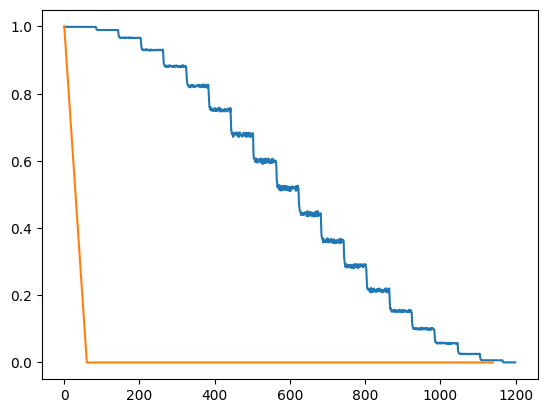

In [6]:
# plot data2
plt.plot(data2[3], label='data2')

# put into 20 bins
bins = np.linspace(0, 1200, 21)
hist, _ = np.histogram(data2[3], bins=bins)
hist = hist / np.sum(hist)
plt.plot(bins[:-1], hist, label='data2 histogram')


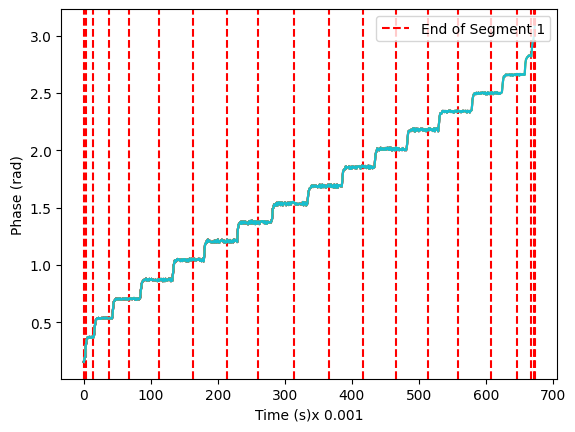

In [7]:
data_2 = []
data_time_bins = []
for i in range(20):
    for j in range(1, 60):
        if abs(data2[3][60 * i + j] - data2[3][60 * i + j - 1]) > 0.001:
            data_2.append(2 * np.arccos(np.sqrt(data2[3][60 * i + j])))
    
    # Plot the data
    plt.plot(data_2)
    
    # Add a vertical line at the end of each iteration
    plt.axvline(x=len(data_2), color='red', linestyle='--', label=f"End of Segment {i + 1}" if i == 0 else None)

# Add labels and legend
plt.xlabel("Time (s)x 0.001")
plt.ylabel("Phase (rad)")
plt.legend(loc="upper right")
plt.show()

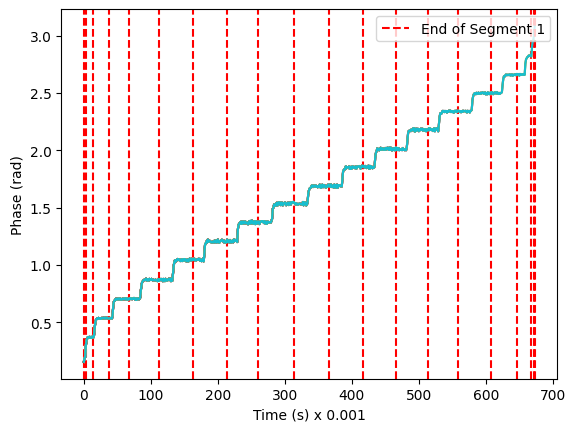

Bin Edges: [0.2 0.8]
Bin Width: 0.6000000000000001


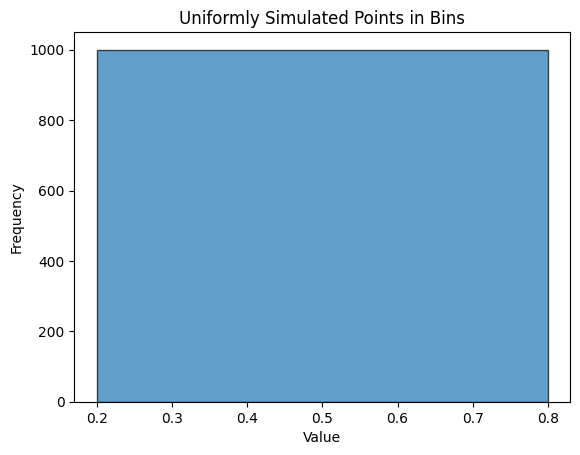

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load pickle data
def load_pickle_data(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

# Load the data from file2
file2 = 'data/nina_measurements_31_1-1.pkl'
data2 = load_pickle_data(file2)

# Extract relevant data
time_unit = data2[0]  # Time unit (s)
start_phases = data2[1]  # Starting phases
end_phases = data2[2]  # Final phases
normalized_powers = data2[3]  # Normalized output powers (1x60 for each measurement)

# Step 1: Store time bins for each measurement
data_time_bins = []
data_2 = []

for i in range(20):  # Loop through 20 measurements
    temp_time_bin = []
    for j in range(1, 60):  # Loop through 60 time samples per measurement
        if abs(normalized_powers[60 * i + j] - normalized_powers[60 * i + j - 1]) > 0.001:
            data_2.append(2 * np.arccos(np.sqrt(normalized_powers[60 * i + j])))
            temp_time_bin.append(2 * np.arccos(np.sqrt(normalized_powers[60 * i + j])))
    
    # Store the time bin for the current segment
    data_time_bins.append(temp_time_bin)

    # Plot the data
    plt.plot(data_2)
    
    # Add a vertical line at the end of each iteration
    plt.axvline(x=len(data_2), color='red', linestyle='--', label=f"End of Segment {i + 1}" if i == 0 else None)

# Add labels and legend
plt.xlabel("Time (s) x 0.001")
plt.ylabel("Phase (rad)")
plt.legend(loc="upper right")
plt.show()

# Step 2: Function to determine time bins for discrete classical data points
def determine_time_bins(data, a, b, max_bins=10):
    """
    Determine time bins for discrete classical data points from interval [a, b].
    Maximizes the length of bins based on the data.

    Parameters:
        data (array-like): The data points to bin.
        a (float): Start of the interval (0 <= a).
        b (float): End of the interval (b <= 1).
        max_bins (int): Maximum number of bins to consider.

    Returns:
        bin_edges (list): The edges of the bins.
        bin_width (float): The width of each bin.
    """
    if not (0 <= a < b <= 1):
        raise ValueError("Interval [a, b] must satisfy 0 <= a < b <= 1.")
    
    # Filter data points within the interval [a, b]
    data = np.array(data)
    data_in_interval = data[(data >= a) & (data <= b)]
    
    if len(data_in_interval) == 0:
        raise ValueError("No data points found in the interval [a, b].")
    
    # Determine the maximum bin width while ensuring all data points are covered
    best_bin_width = 0
    best_bin_edges = []
    
    for num_bins in range(1, max_bins + 1):
        bin_edges = np.linspace(a, b, num_bins + 1)
        bin_width = bin_edges[1] - bin_edges[0]
        
        # Check if all data points fall within the bins
        if np.all((data_in_interval >= bin_edges[0]) & (data_in_interval <= bin_edges[-1])):
            if bin_width > best_bin_width:
                best_bin_width = bin_width
                best_bin_edges = bin_edges
    
    return best_bin_edges, best_bin_width

# Step 3: Maximize bin length based on normalized powers
normalized_powers_flat = np.array(normalized_powers).flatten()  # Flatten the 1x60 data
bin_edges, bin_width = determine_time_bins(normalized_powers_flat, a=0.2, b=0.8)

print("Bin Edges:", bin_edges)
print("Bin Width:", bin_width)

# Step 4: Simulate uniform distribution of points in bins
def simulate_uniform_points(bin_edges, num_points_per_bin=1000):
    """
    Simulate a uniform distribution of points in bins around classical data points.

    Parameters:
        bin_edges (list): The edges of the bins.
        num_points_per_bin (int): Number of uniformly sampled points per bin.

    Returns:
        simulated_points (array): Uniformly sampled points across all bins.
    """
    simulated_points = []
    for i in range(len(bin_edges) - 1):
        bin_start = bin_edges[i]
        bin_end = bin_edges[i + 1]
        points = np.linspace(bin_start, bin_end, num_points_per_bin)
        simulated_points.extend(points)
    return np.array(simulated_points)

# Simulate points for the determined bins
simulated_points = simulate_uniform_points(bin_edges, num_points_per_bin=1000)

# Plot the simulated points
plt.hist(simulated_points, bins=bin_edges, edgecolor='black', alpha=0.7)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Uniformly Simulated Points in Bins")
plt.show()

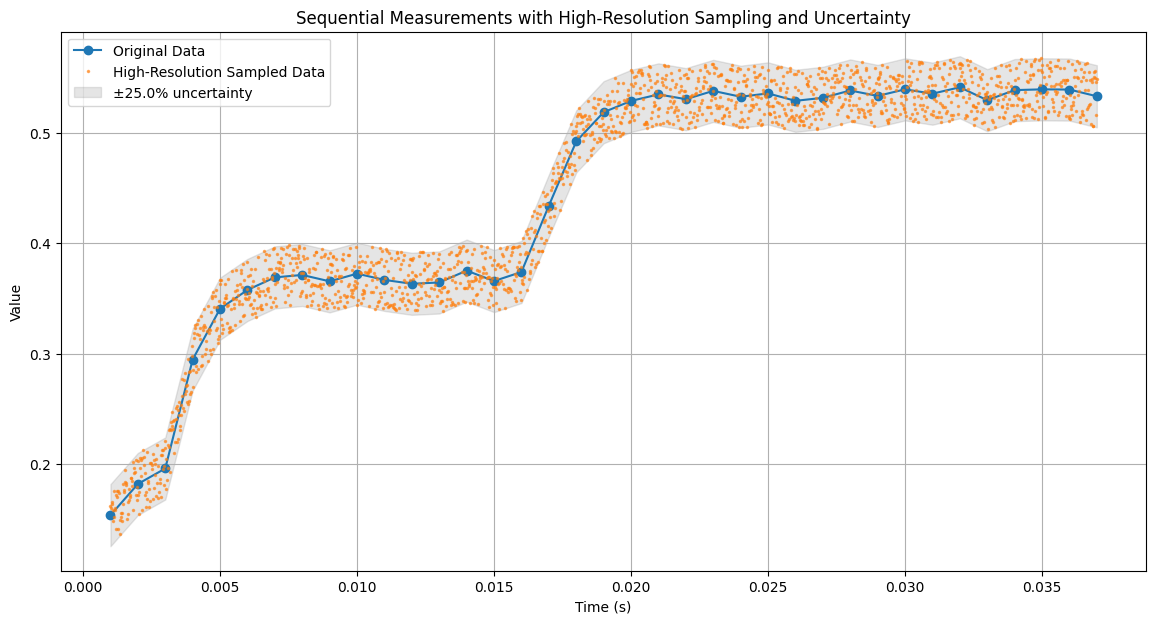

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Original sequential data (time bins with measurements)
original_data = [
    [],
    [0.1537370699326419, 0.18195371571342744, 0.19598937945493053],
    [0.2945663738061746, 0.340581859762385, 0.3575691446022727, 0.3689397523922608, 0.37113518976366594,
     0.3653483006530633, 0.3723058517364352, 0.3666609795778006, 0.36313537036333443, 0.3643310347479643,
     0.37505631183647375],
    [0.3656066683896907, 0.3738231681753193, 0.4338292055259005, 0.4919843308578651, 0.5184081227898462,
     0.528643223810684, 0.5345243114460032, 0.5302181626357518, 0.5377112042246598, 0.5324032428838747,
     0.5354311321799682, 0.528719202316874, 0.5314258308039727, 0.5380741145834089, 0.533133572325086,
     0.5391039082293341, 0.5351925312500827, 0.5409808788624445, 0.5292874618050807, 0.5384142861904718,
     0.5390992499967235, 0.5389157770495606, 0.532834014796919],
    # ... (other bins omitted here for brevity, use complete data in actual execution)
]

# Parameters for sampling
uncertainty_fraction = 0.25
high_res_per_point = 50  # number of high-res points per original data point

def plot_sequential_data(data_bins, uncertainty_fraction=0.25, high_res_per_point=50):
    plt.figure(figsize=(14, 7))
    
    cumulative_time = 0  # start at t=0
    time_original, data_original = [], []

    # Loop over each bin
    for bin_data in data_bins:
        if not bin_data:
            cumulative_time += 0.001  # minimal increment for empty bins
            continue
        
        num_points = len(bin_data)
        time_bin = cumulative_time + np.arange(num_points) * 0.001
        cumulative_time = time_bin[-1] + 0.001  # update cumulative time
        
        # Store original data and time
        time_original.extend(time_bin)
        data_original.extend(bin_data)

    time_original = np.array(time_original)
    data_original = np.array(data_original)
    
    # Calculate uncertainty from original data
    uncertainty = np.std(data_original) * uncertainty_fraction
    
    # High-resolution time and interpolation
    high_res_time = np.linspace(time_original[0], time_original[-1], len(time_original) * high_res_per_point)
    interpolated_data = np.interp(high_res_time, time_original, data_original)
    
    # Sampling around interpolated data
    sampled_data = np.random.uniform(interpolated_data - uncertainty, interpolated_data + uncertainty)

    # Plot original and sampled data
    plt.plot(time_original, data_original, 'o-', label='Original Data')
    plt.plot(high_res_time, sampled_data, '.', alpha=0.6, markersize=3, label='High-Resolution Sampled Data')
    
    plt.fill_between(time_original, data_original - uncertainty, data_original + uncertainty, color='gray', alpha=0.2,
                     label=f'±{uncertainty_fraction*100}% uncertainty')

    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.title('Sequential Measurements with High-Resolution Sampling and Uncertainty')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage with the provided original data
plot_sequential_data(original_data, uncertainty_fraction=0.25, high_res_per_point=50)


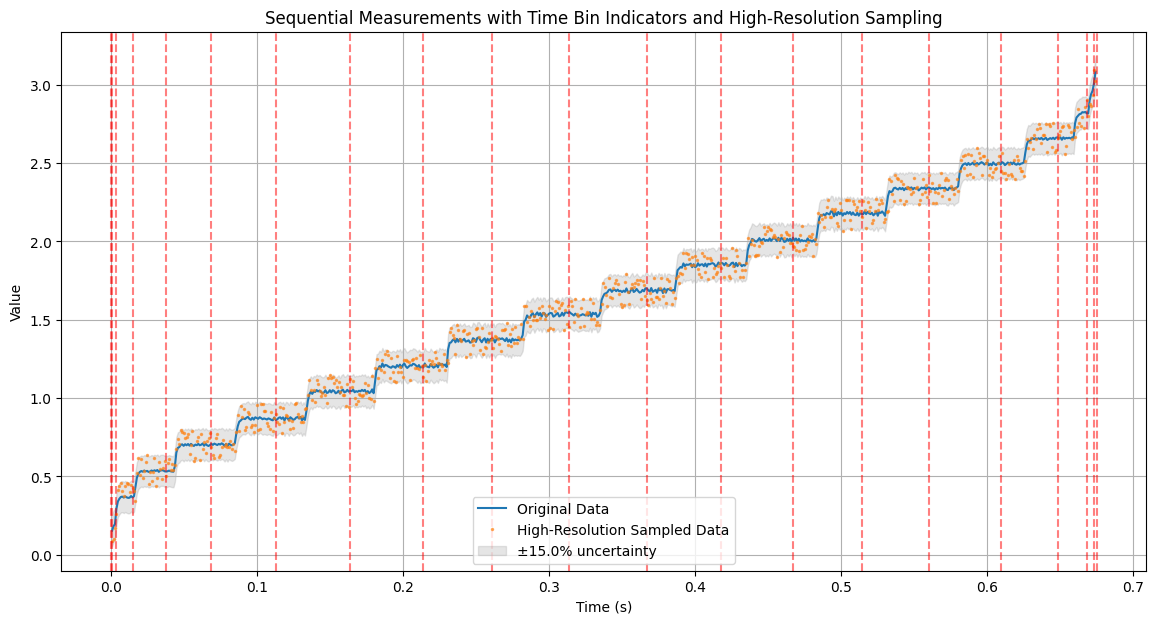

Total number of bins: 20
Total number of measurements: 674
Measurement mean value: 1.6155
Measurement standard deviation: 0.6612
Applied uncertainty (±15.0%): ±0.0992
Sampling time resolution: 0.001s


In [18]:
def plot_sequential_data(data_bins, uncertainty_fraction=0.25, sampling_time_resolution=0.0001):
    plt.figure(figsize=(14, 7))
    
    cumulative_time = 0
    time_original, data_original, bin_edges = [], [], [0]

    # Loop through bins, handling timing and bin edges
    for bin_data in data_bins:
        if not bin_data:
            cumulative_time += 0.001
            bin_edges.append(cumulative_time)
            continue

        num_points = len(bin_data)
        time_bin = cumulative_time + np.arange(num_points) * 0.001
        cumulative_time = time_bin[-1] + 0.001

        time_original.extend(time_bin)
        data_original.extend(bin_data)
        bin_edges.append(cumulative_time)

    time_original = np.array(time_original)
    data_original = np.array(data_original)

    # Uncertainty based on provided fraction of standard deviation
    uncertainty = np.std(data_original) * uncertainty_fraction

    # High-resolution sampled time array
    high_res_time = np.arange(time_original[0], time_original[-1], sampling_time_resolution)
    interpolated_data = np.interp(high_res_time, time_original, data_original)
    sampled_data = np.random.uniform(interpolated_data - uncertainty, interpolated_data + uncertainty)

    # Plotting original and sampled data
    plt.plot(time_original, data_original, '-', label='Original Data')
    plt.plot(high_res_time, sampled_data, '.', alpha=0.6, markersize=3, label='High-Resolution Sampled Data')

    # Plot vertical lines indicating bin separation
    for edge in bin_edges:
        plt.axvline(x=edge, color='red', linestyle='--', alpha=0.5)

    # Uncertainty shading
    plt.fill_between(time_original, data_original - uncertainty, data_original + uncertainty, color='gray', alpha=0.2,
                     label=f'±{uncertainty_fraction*100}% uncertainty')

    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.title('Sequential Measurements with Time Bin Indicators and High-Resolution Sampling')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print relevant parameters
    print(f"Total number of bins: {len(data_bins)}")
    print(f"Total number of measurements: {len(data_original)}")
    print(f"Measurement mean value: {np.mean(data_original):.4f}")
    print(f"Measurement standard deviation: {np.std(data_original):.4f}")
    print(f"Applied uncertainty (±{uncertainty_fraction*100}%): ±{uncertainty:.4f}")
    print(f"Sampling time resolution: {sampling_time_resolution}s")

# Example execution
plot_sequential_data(data_time_bins, uncertainty_fraction=0.15, sampling_time_resolution=0.001)
